<a href="https://colab.research.google.com/github/akanupam/PyTorch-journey/blob/main/04_PyTorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

So, Its a 3 step process to prepare the custom dataset.

 1. Load the dataset whatever it may be.

 2. Transform the data to a specific shape and convert to Tensors.

 3. Make dataloaders in order to train the model.


In [1]:
import torch
from torch import nn

torch.__version__

'2.9.0+cu126'

In [2]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!nvidia-smi

Tue Dec 23 17:51:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory exists.")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/akanupam/Datasets/raw/main/pizza_steak_sushi.zip")
    print("Downloading dataset....")
    f.write(request.content)

  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping data......")
    zip_ref.extractall(image_path)


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping data......


In [5]:
import os
def dir_walkthrough(dir_path):
  for dirpath,dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {(len(filenames))} files images in {dirpath}.")

dir_walkthrough(image_path)

There are 2 directories and 0 files images in data/pizza_steak_sushi.
There are 3 directories and 0 files images in data/pizza_steak_sushi/train.
There are 0 directories and 75 files images in data/pizza_steak_sushi/train/steak.
There are 0 directories and 72 files images in data/pizza_steak_sushi/train/sushi.
There are 0 directories and 78 files images in data/pizza_steak_sushi/train/pizza.
There are 3 directories and 0 files images in data/pizza_steak_sushi/test.
There are 0 directories and 19 files images in data/pizza_steak_sushi/test/steak.
There are 0 directories and 31 files images in data/pizza_steak_sushi/test/sushi.
There are 0 directories and 25 files images in data/pizza_steak_sushi/test/pizza.


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/461689.jpg
Image class: steak
Image height: 512
Image width: 341


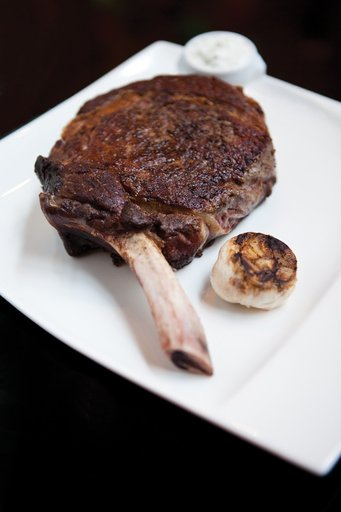

In [7]:
import random
from PIL import Image
random.seed(2)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [8]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [9]:
data_transform  = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

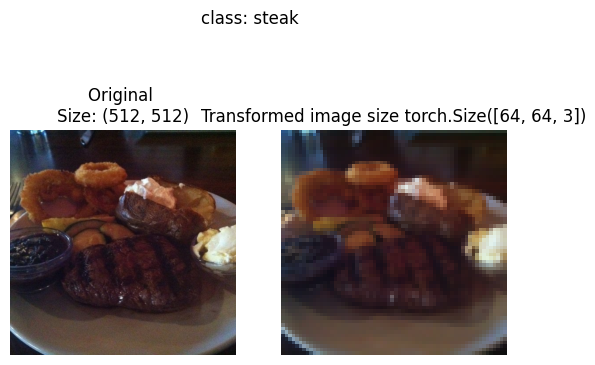

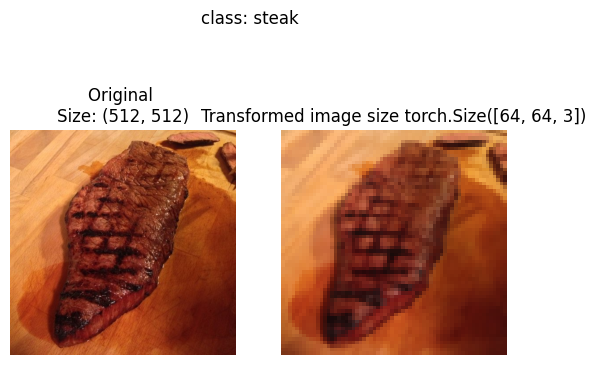

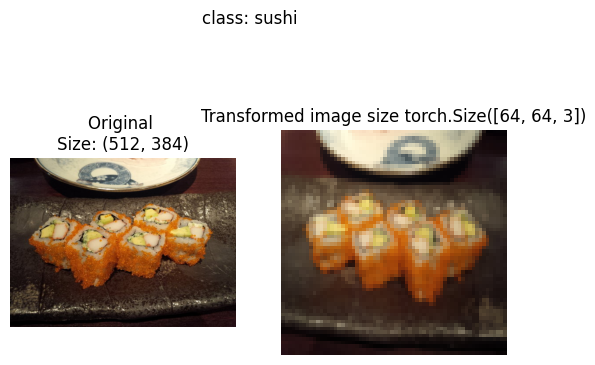

In [10]:
import matplotlib.pyplot as plt
def plot_transform_image(image_paths, transform, n=3, seed=42):
  random.seed(seed)
  random_image_path = random.sample(image_paths, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")
      transform_image = transform(f).permute(1,2,0)
      ax[1].imshow(transform_image)
      ax[1].set_title(f"Transformed image size {transform_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class: {image_path.parent.stem}", fontsize=12)

plot_transform_image(image_paths= image_path_list ,transform= data_transform)

In [11]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform= data_transform,
                                 target_transform=None)
print(f"train data: {train_data}\ntest data:{test_data}")

train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
test data:Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [12]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
len(train_data),len(test_data)

(225, 75)

In [15]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image: {img}")
print(f"Image shape: {img.shape}")
print(f"image datatype{img.dtype}")
print(f"label: {label}")
print(f"label datatype:{type(label)}")

Image: tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


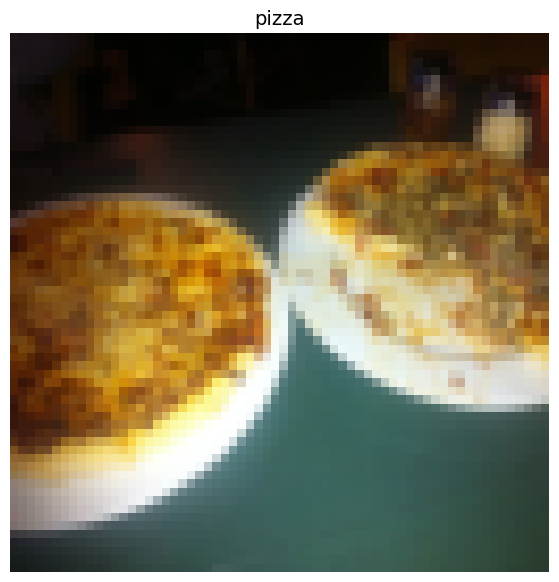

In [16]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [17]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size= 1,
                              shuffle=True,
                              num_workers=1)
test_dataloader= DataLoader(dataset = train_data,
                            batch_size=1,
                            shuffle=False,
                            num_workers=1)


In [18]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


#Model 0

In [19]:
import os
from torchvision import datasets, transforms
simple_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [20]:
train_data_simple = datasets.ImageFolder(root= train_dir,transform=simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir, transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple  = DataLoader(dataset=train_data_simple,
                               batch_size=BATCH_SIZE,
                               num_workers=NUM_WORKERS,
                               shuffle = True,
                               )
test_dataloader_simple = DataLoader(dataset = train_data_simple,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c947dadba10>,
 <torch.utils.data.dataloader.DataLoader at 0x7c947d93d280>)

In [21]:
import torch
from torch import nn

class TinyVGGModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, out_shape: int):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels= input_shape,
                    out_channels= hidden_units,
                    kernel_size= 3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels= hidden_units,
                    out_channels= hidden_units,
                    kernel_size= 3,
                    stride= 1,
                    padding= 1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                       stride = 2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size= 3, padding=1),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
          nn.ReLU(),
          nn.MaxPool2d(2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features= hidden_units*16*16,
                    out_features= out_shape)
      )
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = TinyVGGModel(input_shape=3,
                       hidden_units=10,
                       out_shape=len(train_data.classes)).to(device)
model_0


TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [22]:
img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
2


In [23]:
!pip install torchinfo

In [24]:
import torchinfo

In [25]:
from torchinfo import summary
summary(model_0, input_size= [1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGModel                             [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [26]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc= 0,0
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim =1)
    train_acc += ((y_pred_class == y).sum().item()/len(y_pred))

  train_loss = train_loss/ len(dataloader)
  train_acc = train_acc/ len(dataloader)
  return train_loss, train_acc


In [36]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  model.eval()
  test_loss, test_acc = 0,0
  with torch.inference_mode():
    for batch, (X,y) in enumerate(dataloader):
      X,y = X.to(device), y.to(device)
      test_pred_logits= model(X)
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

  return test_loss, test_acc

In [40]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  results = {
      "train_loss":[],
      "train_acc": [],
      "test_loss": [],
      "test_acc" : []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model,
                                       train_dataloader,
                                       loss_fn,
                                       optimizer)
    test_loss, test_acc = test_step(model,
                                    test_dataloader,
                                    loss_fn)

    print(f"Epoch {epoch+1} :-> train loss: {train_loss}, train_acc: {train_acc}, test_loss: {test_loss}, test_acc: {test_acc}")
    results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
    results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
    results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
    results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

  return results



In [41]:
len(train_data.classes)

3

In [42]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5
model_0 = TinyVGGModel(input_shape= 3, hidden_units=10, out_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr =0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model= model_0,
                        train_dataloader= train_dataloader_simple,
                        test_dataloader= test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn = loss_fn,
                        epochs= NUM_EPOCHS)

end_time = timer()
print(f"Time taken for the training: {end_time-start_time}s")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 :-> train loss: 1.1078356504440308, train_acc: 0.2578125, test_loss: 1.1129125654697418, test_acc: 0.3046875
Epoch 2 :-> train loss: 1.0846447944641113, train_acc: 0.42578125, test_loss: 1.1243258118629456, test_acc: 0.29296875
Epoch 3 :-> train loss: 1.1152557581663132, train_acc: 0.29296875, test_loss: 1.12813800573349, test_acc: 0.29296875
Epoch 4 :-> train loss: 1.0990567207336426, train_acc: 0.2890625, test_loss: 1.1114476770162582, test_acc: 0.29296875
Epoch 5 :-> train loss: 1.0989276021718979, train_acc: 0.29296875, test_loss: 1.115314096212387, test_acc: 0.29296875
Time taken for the training: 6.813419549999935s


In [44]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [48]:
from typing import Dict, List
import matplotlib.pyplot as plt

def plot_loss_curves(results: Dict[str, List[float]]):
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

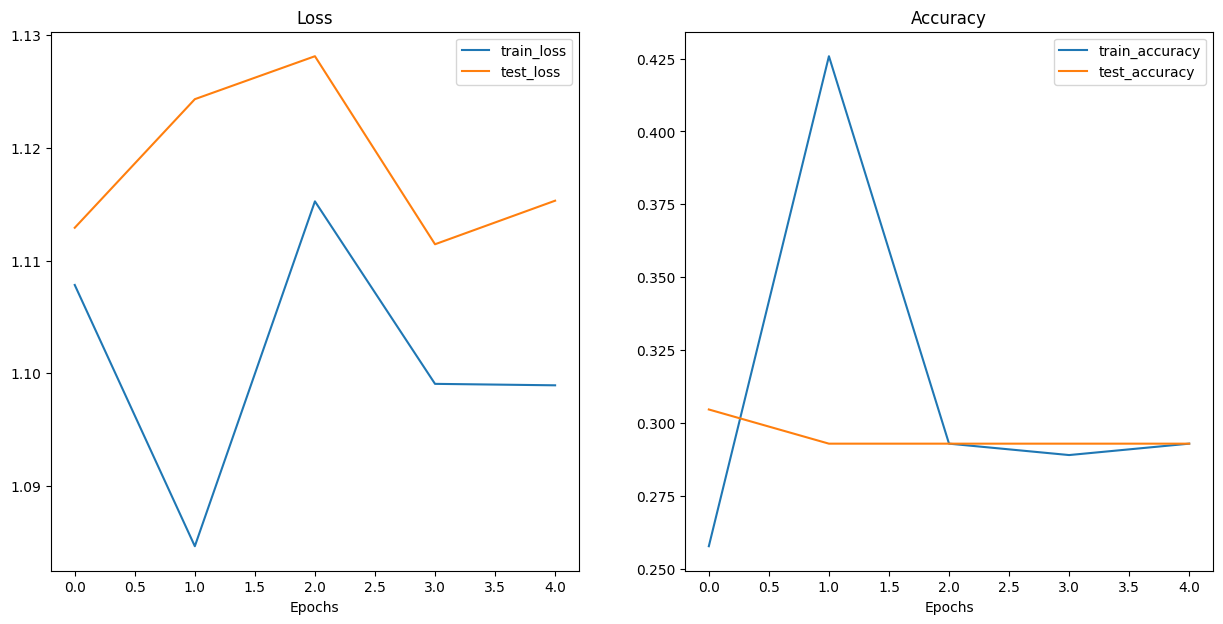

In [49]:
plot_loss_curves(model_0_results)

#Model_1

In [50]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [52]:
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)


In [53]:
import os
BATCH_SIZE =32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle= True,
                                        num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle = False,
                                    num_workers=NUM_WORKERS)
train_dataloader_augmented, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7c9422035cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c941a28c740>)

In [54]:
torch.manual_seed(42)
model_1 = TinyVGGModel(
    input_shape= 3,
    hidden_units= 10,
    out_shape= len(train_data_augmented.classes)
).to(device)
model_1

TinyVGGModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_1.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader= train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Time taken to train model 1 is: {end_time- start_time}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 :-> train loss: 1.1075639575719833, train_acc: 0.25, test_loss: 1.1062372922897339, test_acc: 0.2604166666666667
Epoch 2 :-> train loss: 1.0790704488754272, train_acc: 0.42578125, test_loss: 1.138799826304118, test_acc: 0.2604166666666667
Epoch 3 :-> train loss: 1.080969400703907, train_acc: 0.42578125, test_loss: 1.1696381171544392, test_acc: 0.2604166666666667
Epoch 4 :-> train loss: 1.129259705543518, train_acc: 0.3046875, test_loss: 1.1624986330668132, test_acc: 0.2604166666666667
Epoch 5 :-> train loss: 1.090004026889801, train_acc: 0.42578125, test_loss: 1.147817611694336, test_acc: 0.2604166666666667
Time taken to train model 1 is: 4.843790751999677


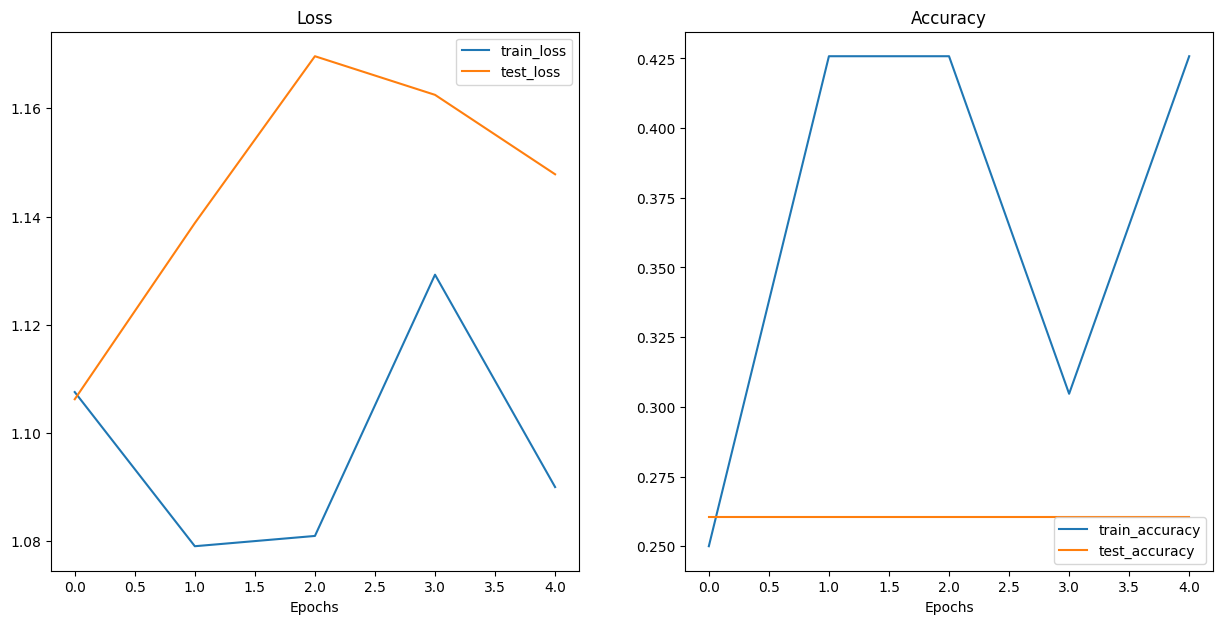

In [56]:
plot_loss_curves(model_1_results)

In [57]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.107836,0.257812,1.112913,0.304688
1,1.084645,0.425781,1.124326,0.292969
2,1.115256,0.292969,1.128138,0.292969
3,1.099057,0.289062,1.111448,0.292969
4,1.098928,0.292969,1.115314,0.292969


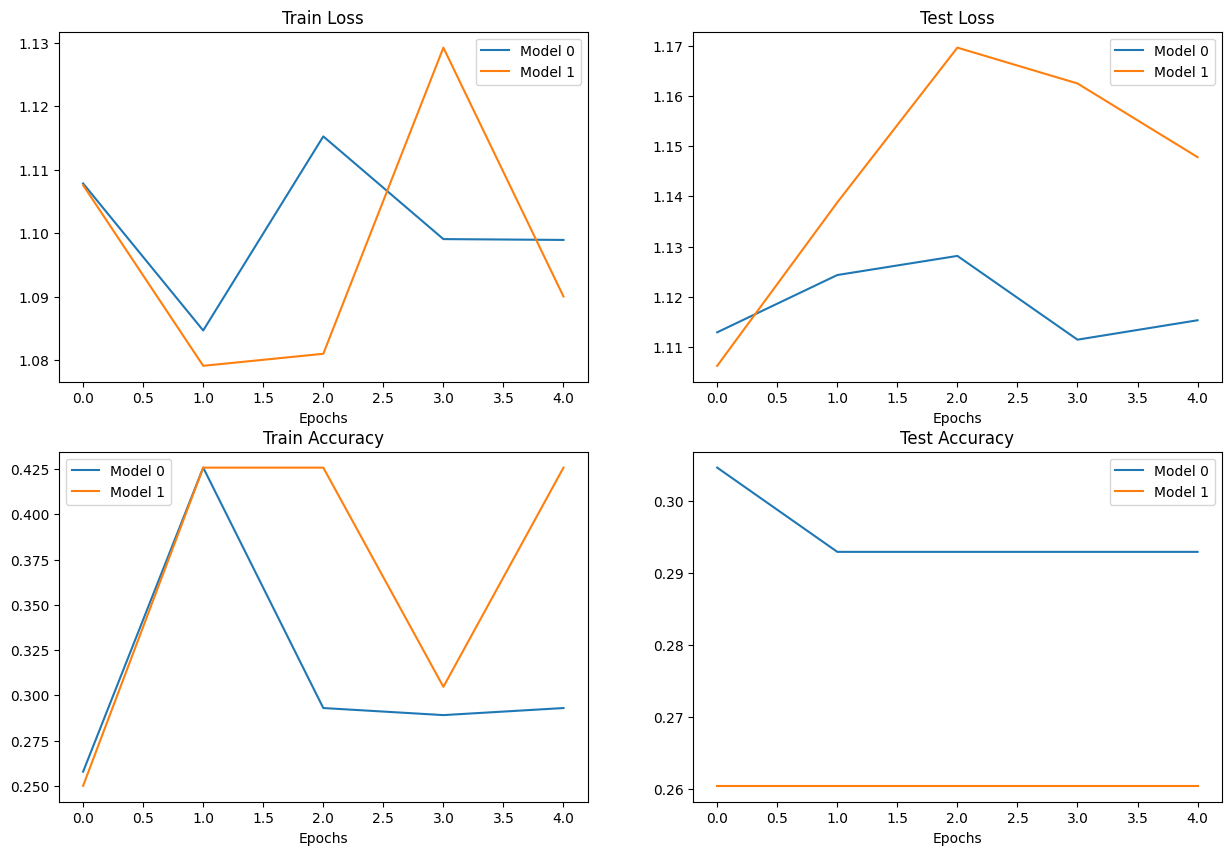

In [58]:
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();

In [83]:
import requests

custom_image_path = data_path / "steakeee.jpg"

if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://wallpaperaccess.com/full/1462828.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [84]:
import torchvision
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)
custom_image = custom_image / 255.

custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])
custom_image_transformed = custom_image_transform(custom_image)

print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")


Original shape: torch.Size([3, 3243, 5200])
New shape: torch.Size([3, 64, 64])


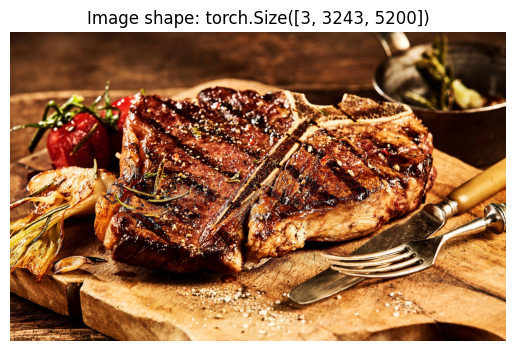

In [85]:
plt.imshow(custom_image.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

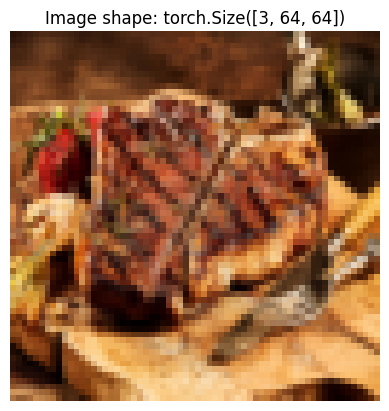

In [86]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.title(f"Image shape: {custom_image_transformed.shape}")
plt.axis(False);

In [87]:
model_1.eval()
with torch.inference_mode():
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [88]:
custom_image_pred
print(f"Prediction logits: {custom_image_pred}")

custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1164,  0.0327, -0.1397]], device='cuda:0')
Prediction probabilities: tensor([[0.3712, 0.3414, 0.2874]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [89]:
custom_image_pred_class = class_names[custom_image_pred_label.to(device)]
custom_image_pred_class

'pizza'

So, due to the less data, less training epochs and low number of hidden layers, the preferred accuracy could not be achieved. However after dealing with all such issues we can definitely get the desired results.
